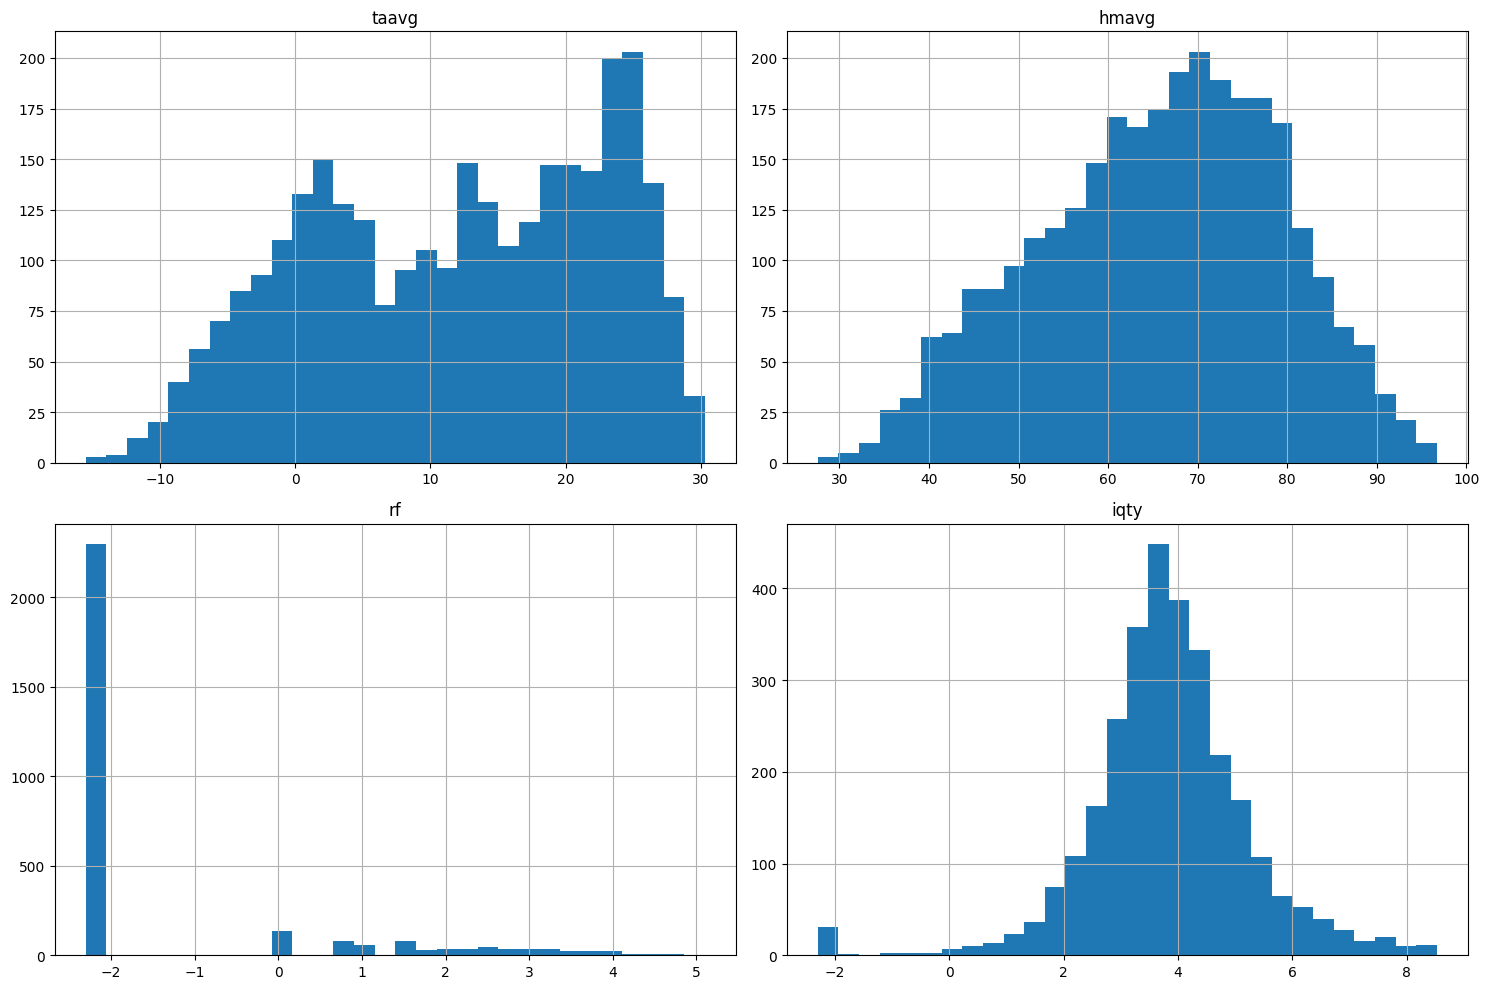

In [3]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt


data = pd.read_csv('data/merged_s.csv')
# Use polynomial interpolation to fill missing values
data_interpolated = data.interpolate(method='polynomial', order=2)
# Apply a log transformation to 'rf' and 'iqty'
data_interpolated['rf'] = np.log(data_interpolated['rf'] + 0.1)
data_interpolated['iqty'] = np.log(data_interpolated['iqty'] + 0.1)
# Plot the histograms of the transformed data
data_interpolated.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()


In [4]:
from sklearn.preprocessing import MinMaxScaler

def create_sequences(data, seq_length):
    xs = []
    ys = []

    for i in range(len(data)-seq_length-1):
        x = data[i:(i+seq_length)]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)

    return np.array(xs), np.array(ys)

# We first scale our data to the range [0, 1]
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_interpolated[['taavg', 'hmavg', 'rf', 'iqty']])

# Choose sequence length
sequence_length = 3

# Create sequences
X, y = create_sequences(data_scaled, sequence_length)

# Split the data into training and test sets
train_size = len((data_scaled)) - 365

X_train = X[:train_size]
y_train = y[:train_size]
X_test = X[train_size:]
y_test = y[train_size:]

# Check the shape of the training and test sets
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((2630, 3, 4), (2630, 4), (361, 3, 4), (361, 4))

In [5]:
import os
pp = os.path.join(os.getcwd(), 'data', 'merged_s.csv')
pp

'c:\\Users\\hj\\transformer\\data\\merged_s.csv'

In [13]:
arr = np.random.normal(0, 2, 100)
mask = (arr > -2.5) & (arr < 0)
mask

array([False,  True,  True,  True,  True, False, False, False, False,
       False,  True, False, False,  True,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True, False,  True, False,  True,  True,  True,
       False, False, False, False, False, False, False,  True, False,
        True,  True, False,  True, False,  True, False, False, False,
       False,  True,  True, False, False, False, False,  True,  True,
       False,  True, False,  True, False, False, False, False,  True,
       False, False,  True, False, False, False, False, False,  True,
       False, False,  True, False, False, False, False,  True, False,
        True, False,  True, False, False, False,  True, False, False,
       False])

In [11]:
a

['gamma1', 'gamma2']